***
# ***Wine Classification - COMS5024A***
***

### **Table of Contents**
- [Introduction](#1)
  * [Context](#5)
- [Imports](#7)
  * [Python Libraries](#8)
  * [Dataset](#9)
- [Exploretory Data Analysis](#10)
  * [Data Overview](#11)
  * [Visualizations](#12)
    * [Univariate Analysis](#13)
    * [Bivariate Analysis](#14)
    * [Multivariate Analysis](#15)
- [Data Pre-processing](#19)
  * [Normalizing Data](#20)
  * [Feature Selection](#20)
- [Modelling](#25)
  * [Model Evaluation](#26)
  * [Hyperparameter Tuning](#26)
      * [Evaluation of Tuned Models](#26)
- [Discussion](#26)
    * [Model Comparison](#30)
      * [Before Hyperparamter Tuning](#31)
      * [After Hyperparamter Tuning](#32)
      * [(Potential) Challenges and Limitations](#33)
    * [Chemical Interpretation](#34)


***
# ***Introduction***
***

## ***Context***

In this notebook I apply two classification algorithms which are Decision Tree and Random Forest to a Wine dataset in order to classify wines into their respective classes based on their chemical properties helping us know how to treat chemical properties in a classification task.

***
# ***Imports***
***

## ***Library Imports***

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## ***Dataset***

In [132]:
df = pd.read_csv("/workspaces/Wine-Classification/wine.csv")

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

In [133]:
df.info()   # basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   C                     178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [134]:
df.head() # first five rows of our data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,C,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [135]:
df.tail()   # last five rows of our data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,C,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [136]:
df.describe()   # basic stats of our data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,C,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [137]:
# checking for missing values
missing_values  = df.isna().sum()
print(f'The number of missing values in each column is: \n {missing_values}.')


The number of missing values in each column is: 
 Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
C                       0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64.


In [138]:
# checking for duplicates
print(f'The number of duplicated rows in this dataframe is: \n {df.duplicated().sum()}')

The number of duplicated rows in this dataframe is: 
 0


## ***Visualizations***

### ***Univariate Analysis***

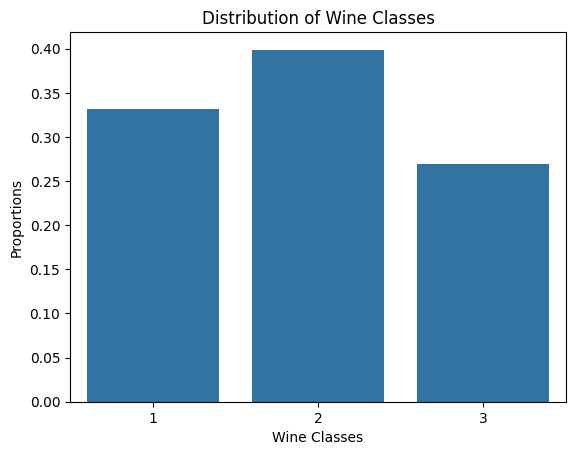

In [139]:
# plotting the distributions of the classes in our data 

proportions = df['Wine'].value_counts(normalize=True)   # counting each class and normalizing the counts
sns.barplot(x=proportions.index, y=proportions.values )
plt.title("Distribution of Wine Classes")
plt.xlabel("Wine Classes")
plt.ylabel("Proportions")
plt.show()

In [140]:
# creating a function to plot the distribution of continuous features

def histogram(feature, data):
    sns.histplot(data=data, x=df[feature], kde=True) # histogram plot
    plt.title(f'Distribution of {feature}')

    return plt.show()

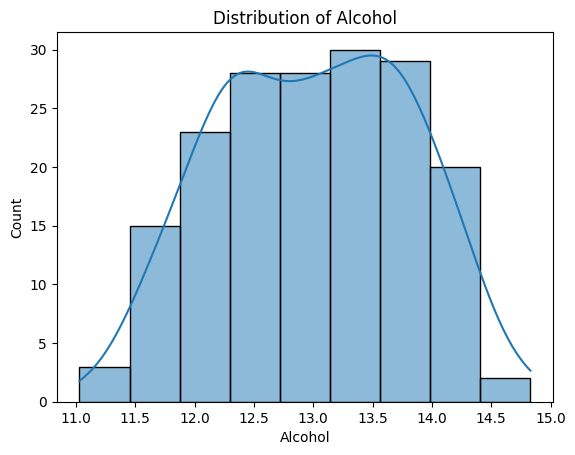

In [141]:
histogram('Alcohol', df)

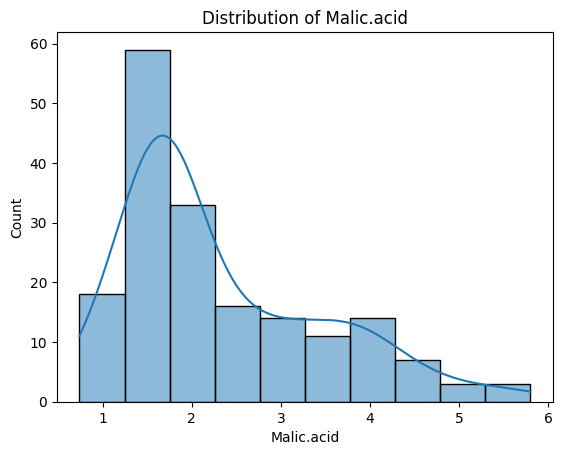

In [142]:
histogram('Malic.acid', df)

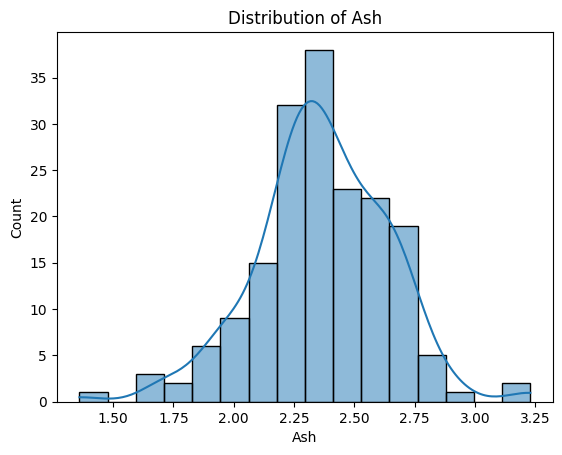

In [143]:
histogram('Ash', df)

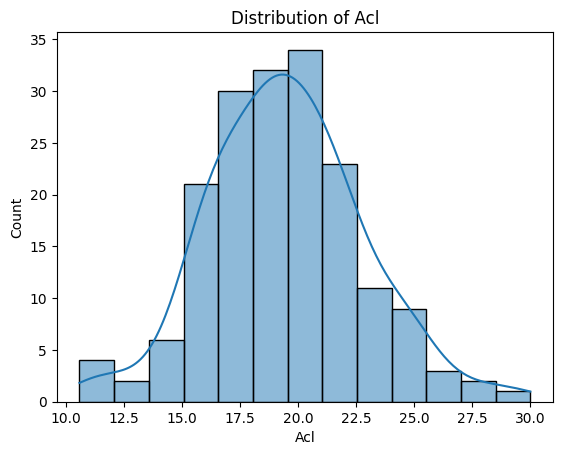

In [144]:
histogram('Acl', df)

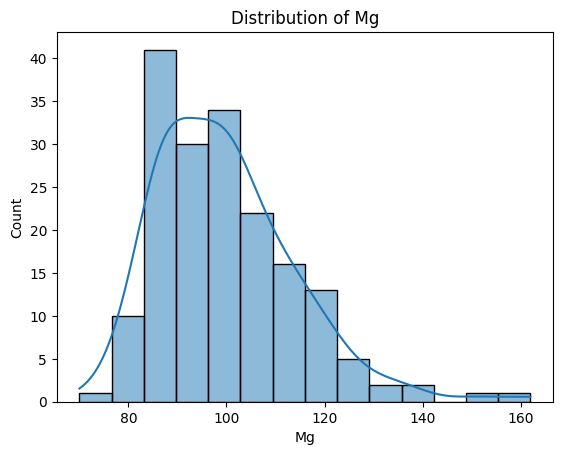

In [145]:
histogram('Mg', df)

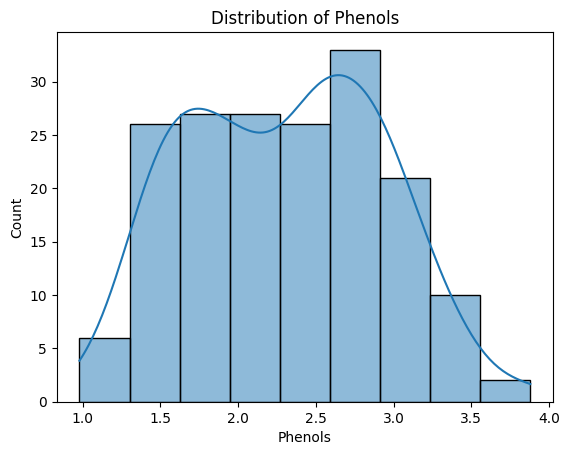

In [146]:
histogram('Phenols', df)

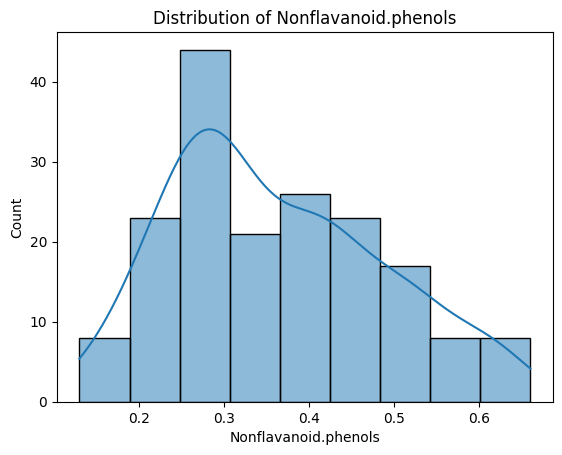

In [147]:
histogram('Nonflavanoid.phenols', df)

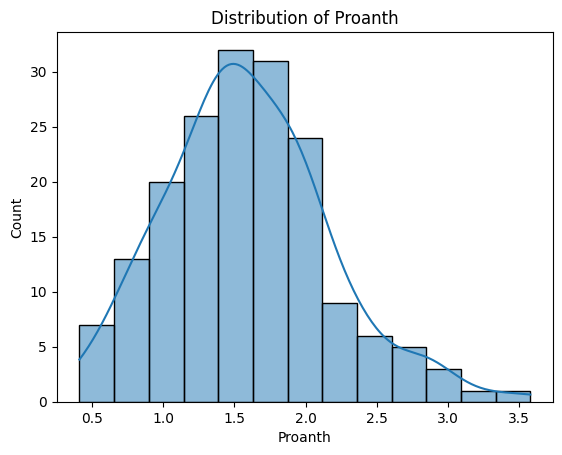

In [148]:
histogram('Proanth', df)

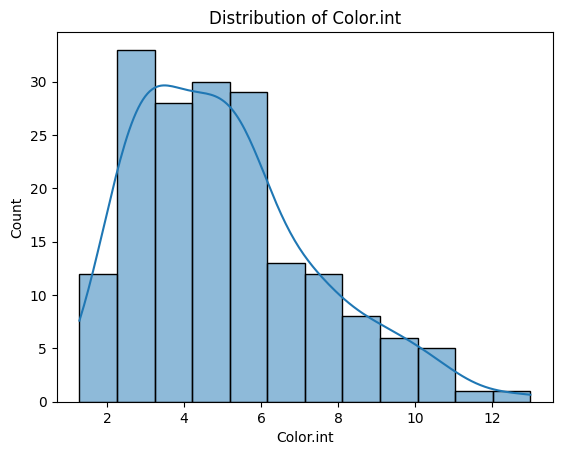

In [149]:
histogram('Color.int', df)

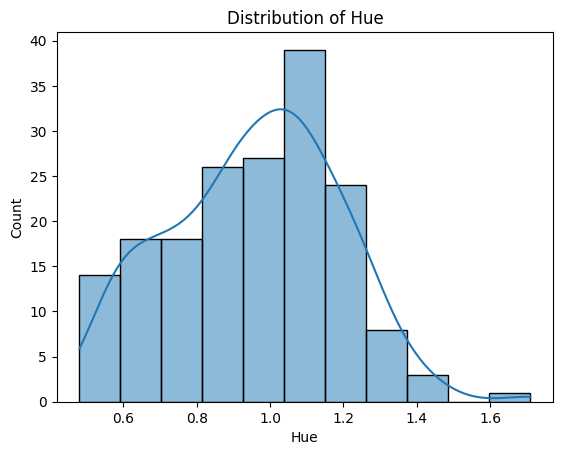

In [150]:
histogram('Hue', df)


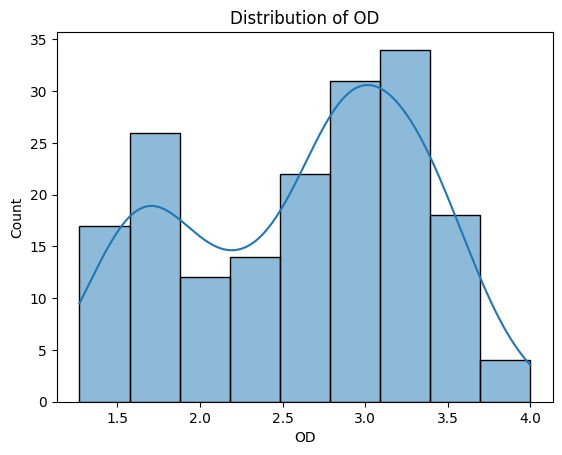

In [151]:
histogram('OD', df)

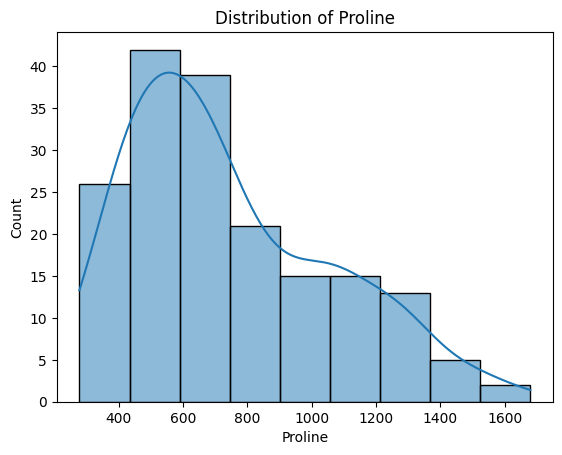

In [152]:
histogram('Proline', df)

## ***Bivariate Analysis***

In [153]:
# creating a function for feature to feature plots

def scatter(feature1, feature2, data):
     
    custom_palette = ['blue', 'green', 'red']   # list fof custom colors for hue
    sns.scatterplot(x=data[feature1], y=data[feature2], hue=data['Wine'], palette=custom_palette) # scatterplot
    plt.title(f'{feature1} VS {feature2}')
    plt.xlabel(f'{feature1}')
    plt.ylabel(f'{feature2}')

    return plt.show()


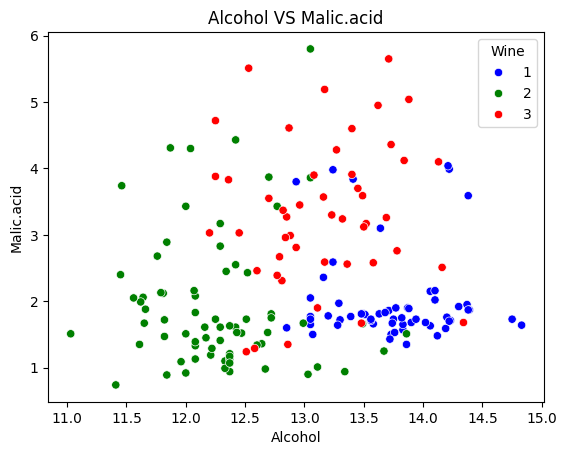

In [154]:
scatter('Alcohol', 'Malic.acid', df)

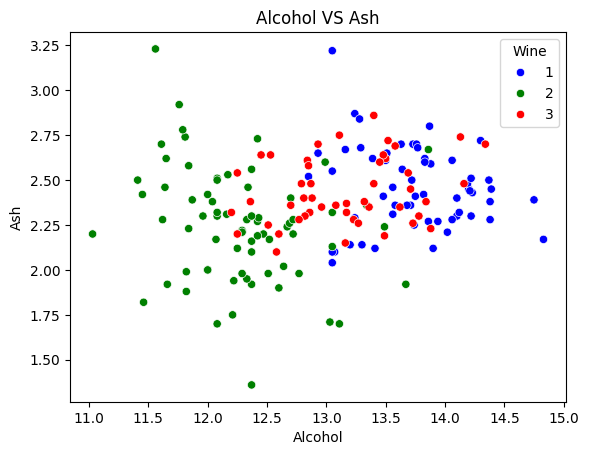

In [155]:
scatter('Alcohol', 'Ash', df)

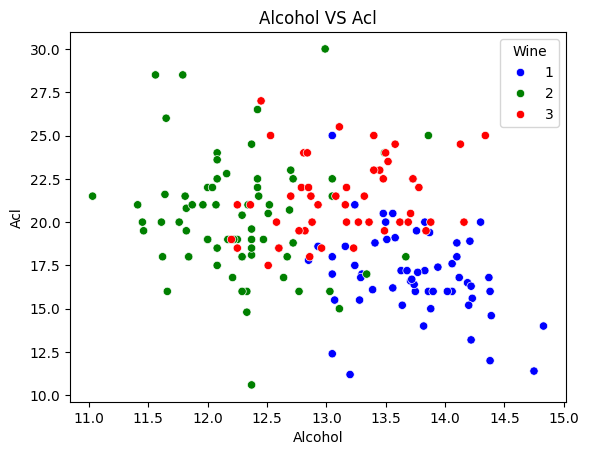

In [156]:
scatter('Alcohol', 'Acl', df)

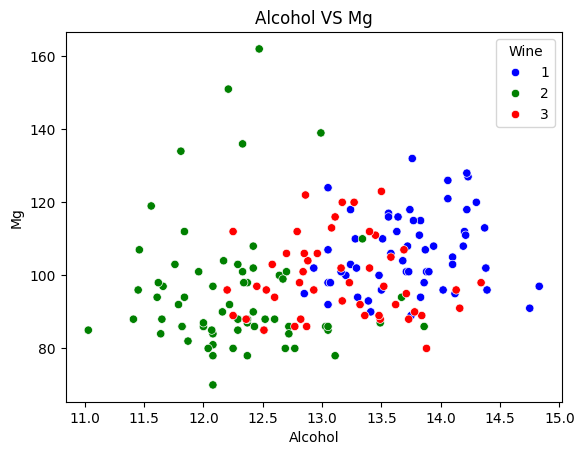

In [157]:
scatter('Alcohol', 'Mg', df)

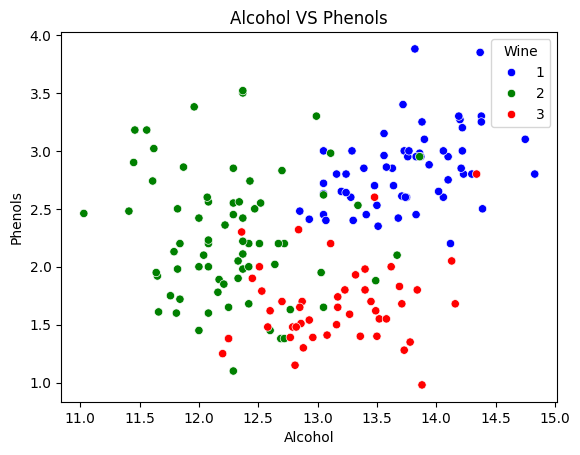

In [158]:
scatter('Alcohol', 'Phenols', df)

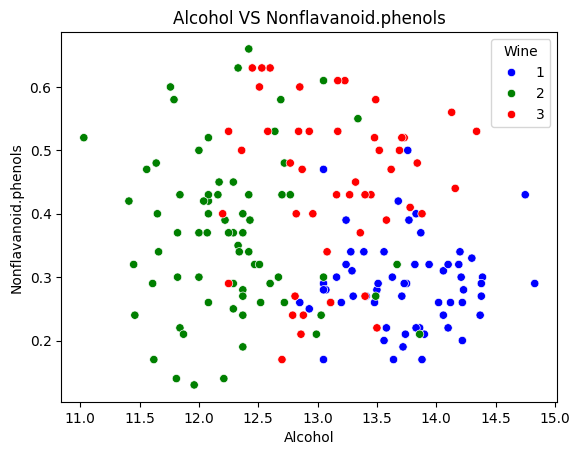

In [159]:
scatter('Alcohol', 'Nonflavanoid.phenols', df)

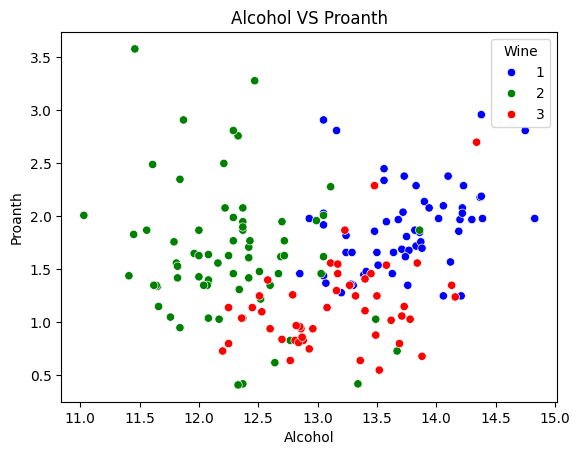

In [160]:
scatter('Alcohol', 'Proanth', df)

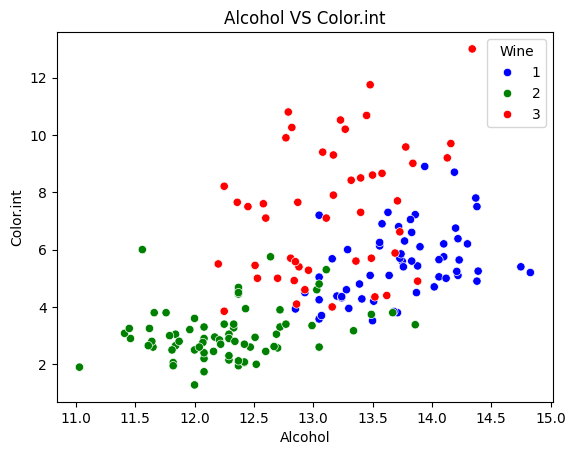

In [161]:
scatter('Alcohol', 'Color.int', df)

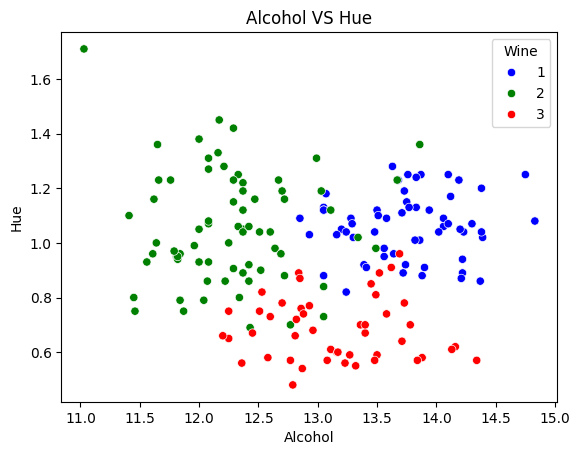

In [162]:
scatter('Alcohol', 'Hue', df)

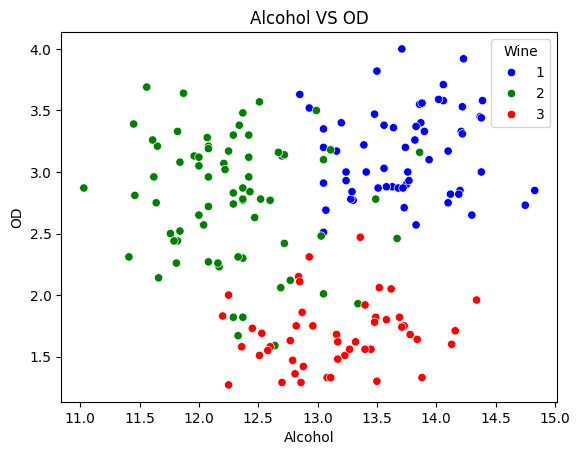

In [163]:
scatter('Alcohol', 'OD', df)

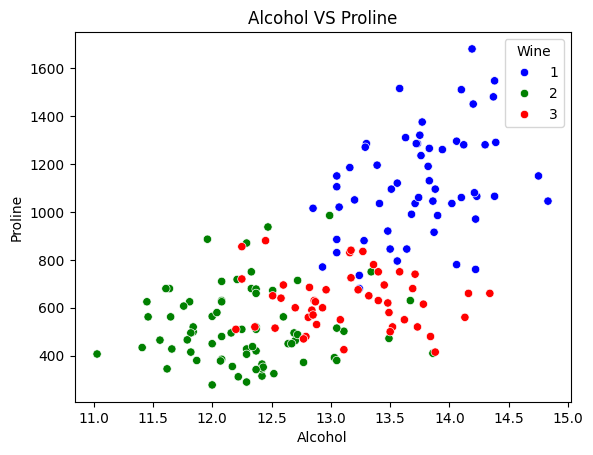

In [164]:
scatter('Alcohol', 'Proline', df)

## ***Multivariate Analysis***

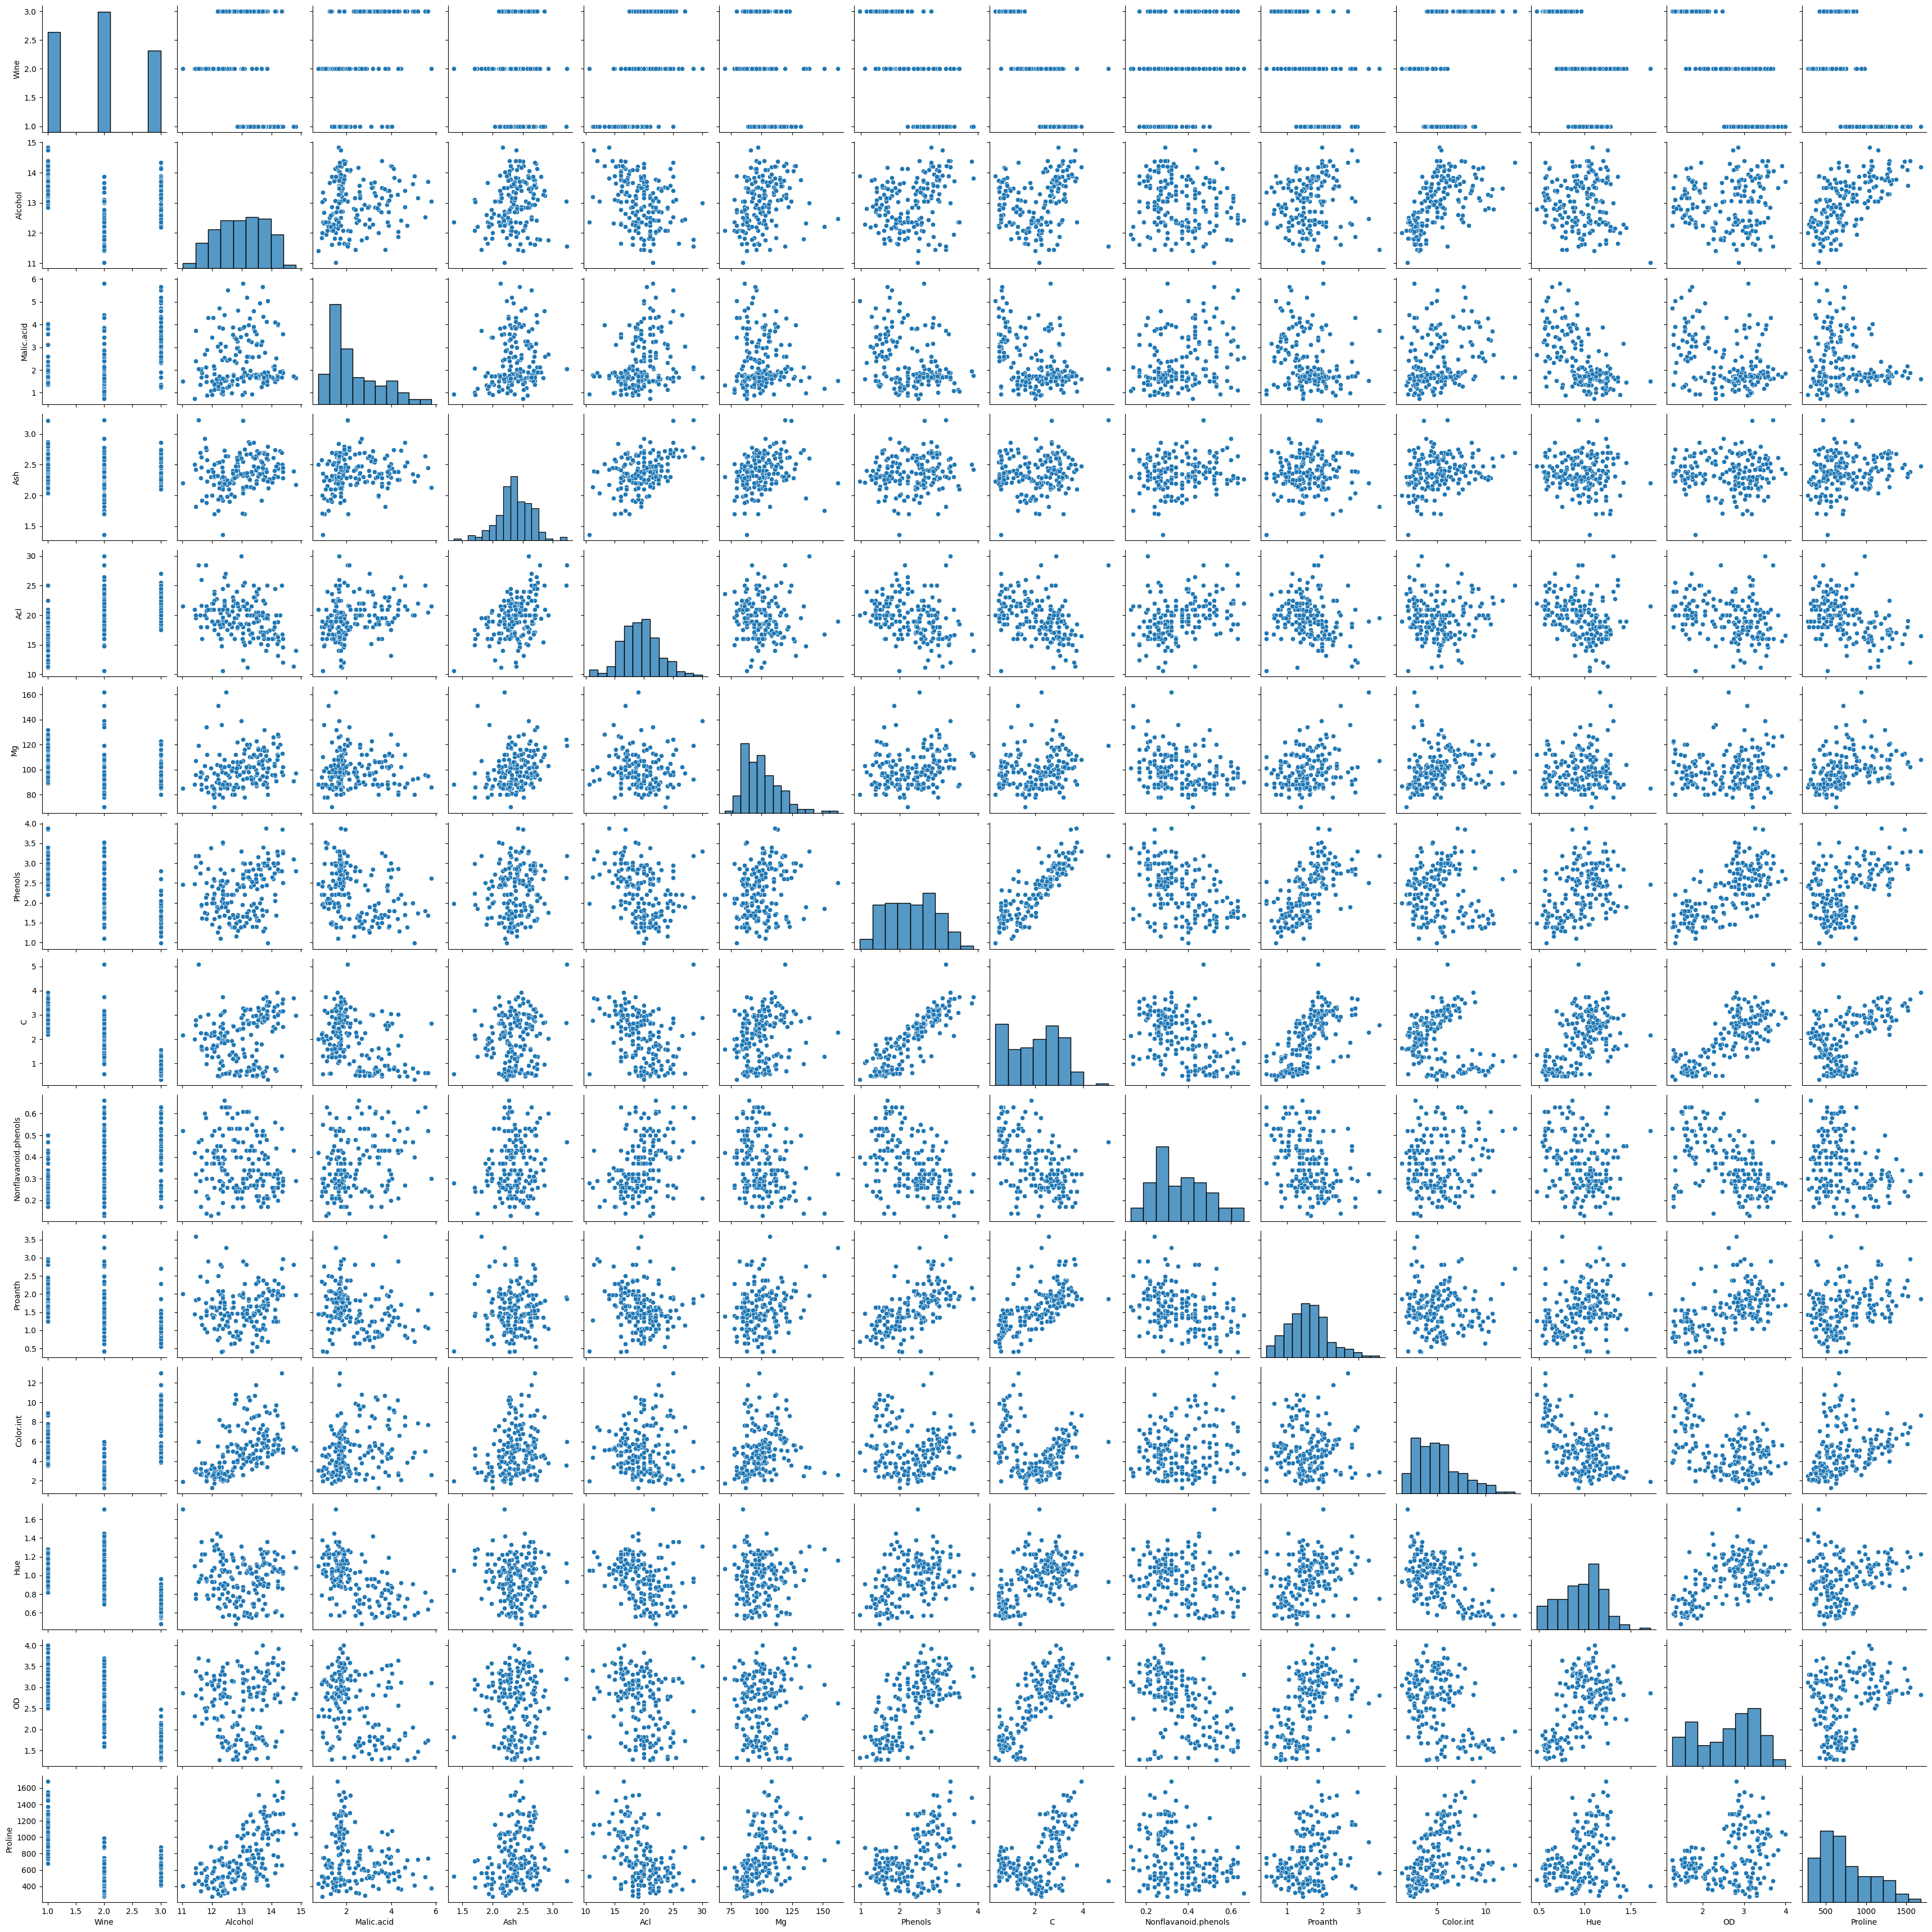

In [165]:
sns.pairplot(data=df)   # plotting a feature to multi-features plot
plt.show()

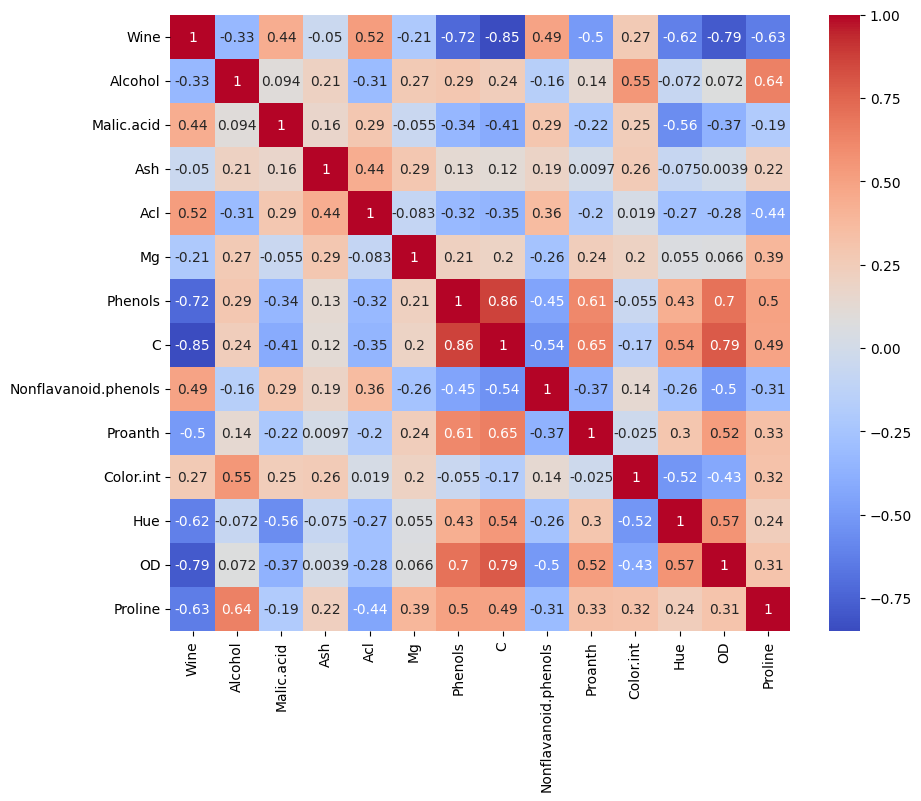

In [166]:
plt.figure(figsize=(10, 8))     # size of the figure
sns.heatmap(data=df.corr(), annot=True, cbar=True, cmap='coolwarm')     # heatmap to plot the correlation features to each other
plt.show()

***
# ***Data Preprocessing***
***

## ***Normalizing Data***

In [167]:
X = df.iloc[:, 1:]  #  input data
Y = df.iloc[:, 0]   # target/classes

In [168]:
scaler = MinMaxScaler()  # an instance for Normalization
X_scaled = scaler.fit_transform(X)  # normalizing the data between 0 and 1

## ***Feature Selection***

In [169]:
# creating a Principal Component Analysis Function to select the features that have an explained variance iof 90% for better model performance

def pca_analysis(data, column_names):
    variance = {}   # creating a dictionary to store the explained variance value and its respective principal component

    pca = PCA() # principal component analysis instance
    principal_components = pca.fit_transform(data)  # transforming the data to a PCA reference system
    comp = pca.components_  # the actual principal components
    explained_variance = pca.explained_variance_ratio_  # the explained variance of a principal component

    for column, value in zip(column_names, explained_variance):   # assigning ach component to its explained variance value
      variance[column] = round(value, 4)

    # Plotting the explained variance of our Principal Components
    plt.plot(np.cumsum(explained_variance), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid()
    plot = plt.show()

    pca_df = pd.DataFrame(principal_components, columns=column_names)     # creating a dataframe of the principal components

    return plot, variance, pca_df, explained_variance, comp

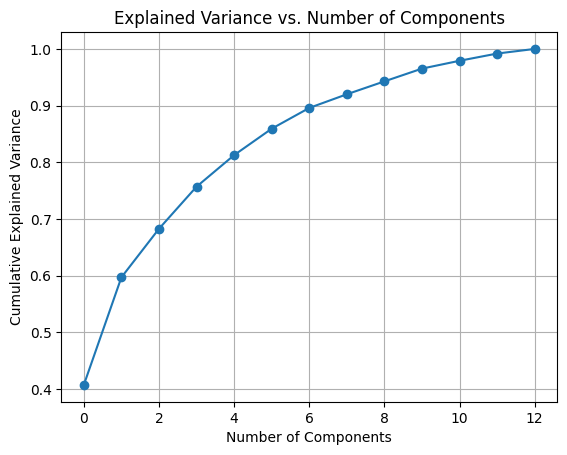

In [170]:
column_names = X.columns        # list of original column names of my input data

plot, variance, pca_df, explained_variance, comp= pca_analysis(X_scaled, column_names)

In [171]:
pca_df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,C,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172


In [172]:
# The principal components and how much explained variance the cover out of 100% of the data

for key, value in variance.items():
    print (f'{key} : {value*100:.2f} % ')

Alcohol : 40.75 % 
Malic.acid : 18.97 % 
Ash : 8.56 % 
Acl : 7.43 % 
Mg : 5.57 % 
Phenols : 4.66 % 
C : 3.66 % 
Nonflavanoid.phenols : 2.41 % 
Proanth : 2.27 % 
Color.int : 2.25 % 
Hue : 1.38 % 
OD : 1.27 % 
Proline : 0.82 % 


In [173]:
X_reduced = pca_df.iloc[:, :7] # Reducing our data to 7 features since they can explain about 90% of the variance in our data.

In [174]:
# splitting the data to testing and training
# the shuffling command is to ensure each class can be properly distributed

X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.4, shuffle=True, random_state=42)

***
# ***Modelling***
***

### ***Model 1***

In [175]:
# Decision Tree Model

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)     # training the model

y_pred = model.predict(X_test)      # model prediction

In [176]:
# creating a function to output the feature importance for a specific model

def feature_importance(model, input_data):

    feature_importance_dict = {}    # dictionary to store the feature and the value of its importance
    feature_importances = model.feature_importances_    # retrieving the features and their value of importance

    feature_names = input_data.columns # feature names

    for column, importance in zip(feature_names, feature_importances):
        feature_importance_dict[column] = round(importance, 4)

    return feature_importance_dict


In [177]:
feature_importance_dict = feature_importance(model, X_train)
print(f'The feature importance for the Decision Tree Model is: \n ')

for key, value in feature_importance_dict.items():
    print (f'{key} : {value*100} % ')

The feature importance for the Decision Tree Model is: 
 
Alcohol : 43.1 % 
Malic.acid : 52.2 % 
Ash : 1.92 % 
Acl : 0.0 % 
Mg : 2.78 % 
Phenols : 0.0 % 
C : 0.0 % 


### ***Model 2***

In [178]:
# Random Forest Model

model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train, Y_train)      # training the model

y_pred_2 = model_2.predict(X_test)      # model prediction

In [179]:
feature_importance_dict = feature_importance(model_2, X_train)
print(f'The feature importance for the Random Forest Model is: \n')

for key, value in feature_importance_dict.items():
    print (f'{key} : {value*100:.2f} %')

The feature importance for the Random Forest Model is: 

Alcohol : 38.52 %
Malic.acid : 38.89 %
Ash : 5.42 %
Acl : 3.23 %
Mg : 5.86 %
Phenols : 3.68 %
C : 4.39 %


## ***Model Evaluation***

In [180]:
# creating a function to evaluate the model

def model_evaluation(test_targets, predict_targets, model):

    if isinstance(model, DecisionTreeClassifier):
        Name = "Decision Tree Classifier"

    elif isinstance(model, RandomForestClassifier):
        Name = "Random Forest Classifier"

    # the classification report of a model
    report = classification_report(test_targets, predict_targets)
    print(f'The classification report for the {Name} is: \n {report}')

    # the confusion matrix of the model
    cm = confusion_matrix(test_targets, predict_targets, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.plasma)
    disp.ax_.grid(False)
    plt.title(Name+ " confusion matrix")

    return

The classification report for the Decision Tree Classifier is: 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       1.00      0.93      0.96        27
           3       0.95      0.95      0.95        19

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



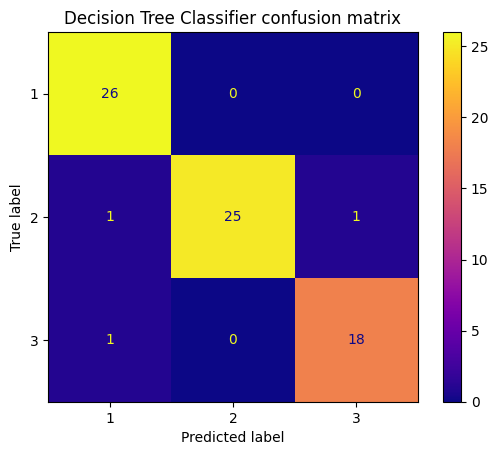

In [181]:
model_evaluation(Y_test, y_pred, model)

The classification report for the Random Forest Classifier is: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        27
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



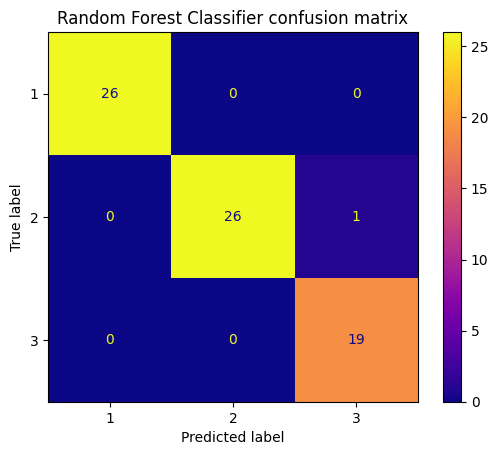

In [182]:
model_evaluation(Y_test, y_pred_2, model_2)

## ***Hyperparameter Tuning***

In [192]:
# creating a function for hyperparameter tuning

def hyperparameter_tuning(X_train, y_train, model):

    # this is a parameter grid for Decision Tree Model
    if isinstance(model, DecisionTreeClassifier):

        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None] + list(np.arange(10, 51, 10)),
            'min_samples_split': list(np.arange(2, 11)),
            'min_samples_leaf': list(np.arange(1, 5)),
            'max_features': [None, 'sqrt', 'log2']
        }

    # this is a parameter grid for Random Forest Model
    elif isinstance(model, RandomForestClassifier):

        param_grid = {
            'n_estimators': list(np.arange(50, 251, 50)),
            'criterion': ['gini', 'entropy'],
            'max_depth': [None] + list(np.arange(10, 41, 10)),
            'min_samples_split': list(np.arange(2, 11)),
            'min_samples_leaf': list(np.arange(1, 5)),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }

    # using a Randomized Search CV algorithm for hyperparameter tuning
    randomized_search_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=2, n_iter=100, random_state=42)
    randomized_search_model.fit(X_train, y_train)

    Tuned_params = randomized_search_model.best_params_     # best parameters from the tuning
    Tuned_model = randomized_search_model.best_estimator_   # the tuned model

    return Tuned_params, Tuned_model


In [193]:
Tuned_params, Tuned_model = hyperparameter_tuning(X_train, Y_train, model)


print(f"The best hyperparameters for Decision Tree are: \n")

for key, value in Tuned_params.items():
    print (f'{key} : {value}')

The best hyperparameters for Decision Tree are: 

min_samples_split : 6
min_samples_leaf : 3
max_features : None
max_depth : 30
criterion : gini


In [194]:
Tuned_params, Tuned_model_2 = hyperparameter_tuning(X_train, Y_train, model_2)

print(f"The best hyperparameters for Random Forest are: \n")

for key, value in Tuned_params.items():
    print (f'{key} : {value}')

The best hyperparameters for Random Forest are: 

n_estimators : 250
min_samples_split : 8
min_samples_leaf : 1
max_features : sqrt
max_depth : None
criterion : entropy
bootstrap : True


### ***Evaluation of Tuned Models***

***Tuned Model 1***

In [195]:
y_pred = Tuned_model.predict(X_test)

In [196]:
feature_importance_dict = feature_importance(Tuned_model, X_train)
print(f'The feature importance for the Decision Tree Model is: \n')

for key, value in feature_importance_dict.items():
    print (f'{key} : {value*100:.2f} %')

The feature importance for the Decision Tree Model is: 

Alcohol : 44.82 %
Malic.acid : 55.18 %
Ash : 0.00 %
Acl : 0.00 %
Mg : 0.00 %
Phenols : 0.00 %
C : 0.00 %


The classification report for the Decision Tree Classifier is: 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       0.93      0.96      0.95        27
           3       0.95      0.95      0.95        19

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



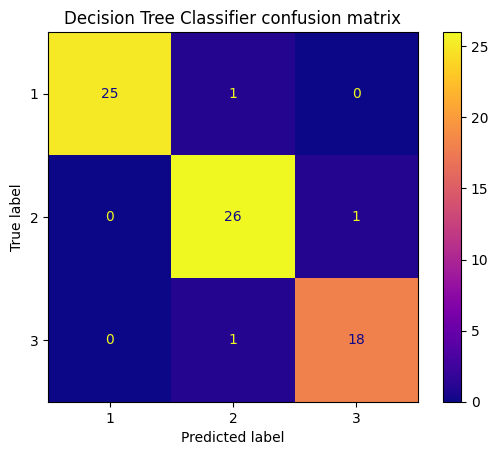

In [197]:
model_evaluation(Y_test, y_pred, Tuned_model)

***Tuned Model 2***

In [198]:
y_pred_2 = Tuned_model_2.predict(X_test)

In [199]:
feature_importance_dict = feature_importance(Tuned_model_2, X_train)
print(f'The feature importance for the Random Forest Model is: \n')

for key, value in feature_importance_dict.items():
    print (f'{key} : {value*100:.2f} %')

The feature importance for the Random Forest Model is: 

Alcohol : 41.23 %
Malic.acid : 40.00 %
Ash : 4.54 %
Acl : 2.64 %
Mg : 5.21 %
Phenols : 2.57 %
C : 3.82 %


The classification report for the Random Forest Classifier is: 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       0.96      0.96      0.96        27
           3       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



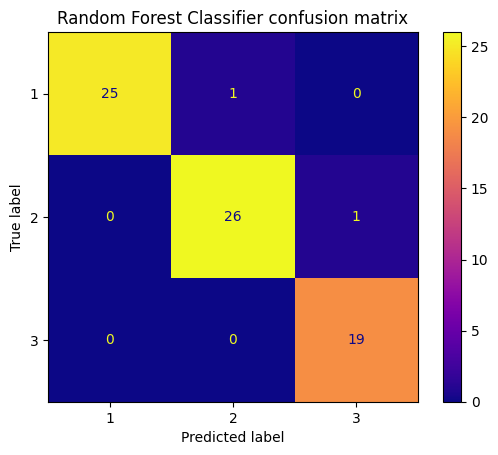

In [200]:
model_evaluation(Y_test, y_pred_2, Tuned_model_2)

***
# ***Discussion***
***

For this wine classification task I used the Decision Tree and Random Forest Classifier. The Wine dataset consisted of three classes labelled 1, 2 and 3. The dataset also consisted of thirteen features which included:
Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, C, Nonflavanoid.phenols, Proanth,Color.int, Hue, OD, Proline. I perfomed an Exploratory Data Analysis, then a Data Preprocessing and lastly Modelled the data.

## ***Model Comparison***

### ***Before Hyperparameter Tuning***

Looking at the Modelling section, subsection Model 1, I named the Decision Tree Classifier "model" which initially included the default hyperparameters as well as subsection Model 2, I named the Random Forest Classifier "model_2" which also included the default hyperparameters. After training the models I evaluated them using the test data. Starting with Decision Tree Classifier. Looking at the classification report the model had a precision of 93% for class 1, 100% for class 2, 95% for class 3. The precision tells us how good our model is at positive predictions. Then the recall was 100% for label 1, 93% for label 2 and 95% for label 3. Recall is the probability of a positive test result, conditioned on the individual truly being positive. From the results above it performed fairly value. This can be further seen on the confusion matrix whereby the model misclassified label 1 twice, label 2 zero times and label 3 once. Now looking at the classification report for the Random Forest Classifier, we can see that the model had the precision of 100% for label 1, 100% for label 2 and 95% for label 3. Futhermore, the confusion matrix shows that label 1 was misclassified zero times, label 2 zero times and label 3 once. The recall for label 1 is 100%, label 2 is 96% and label 3 is 100%. This can be seen further of the confusion matrix whereby label 1 was misclassified zero times, label 2 zero times and label 3 once.

It is clear that model 2 performed better for all the classes apart from label 3, which showed no improvement. It still misclassified label 3 once. Random Forest Classifier performed better then Decision Tree Classifier given the fact that I used their default inputs for their attributes. But this was before i performed the hyperparameter tuning on both models.

### ***After Hyperparameter Tuning***

Althought the models are performing I wanted to push them further possibly for perfect classification. I used the Randomized Search CV algorithm in an attempt to improve and compare both models. After I applied the algorithm on the models the following hyperparameter where selected by the algorithm for the Decision Tree Classifier:

* min_samples_split : 6
* min_samples_leaf : 3
* max_features : None
* max_depth : 30
* criterion : gini

Whilst for the Random Forest Classifier:

* n_estimators : 250
* min_samples_split : 8
* min_samples_leaf : 1
* max_features : sqrt
* max_depth : None
* criterion : entropy
* bootstrap : True

Given these new hyperparameters I evaluated the models. Starting with the classification report of the tuned Decision Tree Classifier we can see that the precision of label 1 is 100% , label 2 is 93%, label 3 is 95%. This shows us the model improved in classifying label 1 and go worse for label 2 whilst label 3 reminded the same. This can be further seen from the confusion matrix were label 1 is misclassified zero times, label 2 is twice and label 3 is once. In overall the model did not improve from the original one. Looking at the classification report of the tuned Random Forest Classifier, the precision of label 1 is 100%, label 2 is 96% and label 3 is 95%. This showed that the model did not improve overall as the tuned model misclassified label 2 more whilst the other two classes are still the same.

The untuned Random Forest Classifier performed best for this classification task compared to the Decision Tree Classifier because:

* Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It takes the average decision made between individual trees. Making it a more robust and accurate method compared to a single decision tree.
* Decision trees are more prone to overfitting, which leads to poor generalization to test/unseen data. Random Forest lessens this by averaging the predictions from multiple trees.
* Random Forest introduces randomness in the feature selection process for each tree. This makes it less sensitive to the specific features present in the dataset and helps in preventing the dominance of a single feature. Decision trees can be heavily influenced by the most informative feature, which can lead to overfitting.

### ***(Potential) Challenges and Limitations***

* Small Dataset, although the proportions of the targets are more or less the same, during the training of the model, based on the test/train size you picked, there chances of having a test sample without at most one target. To avoid that I increased the test size to 40% and made sure to shuffle the dataset before the split.
* Hyperparameter Tuning with Randomized Search CV, randomly selects the what it thinks is the best combination of features and it is possible that it not be the actual best combination of features to improve the model.
* Feature Selection with PCA, although I normalized the data to ensure the scale of the features is the same, PCA depends on the distribution of the data and about half of the features as seen from the Multivariate analysis do not have a linear distribution.

## ***Chemical Interpretation***

Looking at the chemical properties for the wine classification task, I will be using the best model which was the untuned Random Forest Classifier. I initially used Principal Component Analysis for feature selection in order to find the chemicals who could explain about 90% of the variance of the data which were 7 out of 13 features seen below:

* Alcohol : 40.75 % 
* Malic.acid : 18.97 % 
* Ash : 8.56 % 
* Acl : 7.43 % 
* Mg : 5.57 % 
* Phenols : 4.66 % 
* C : 3.66 %

This shows that the other chemicals were not going to efficiently contribute to the classification task. I used these chemicals to train my Random Forest Classifier. I also created a function to return the feature importance of each chemical which was:

The feature importance for the Random Forest Model is: 

* Alcohol : 38.52 %
* Malic.acid : 38.89 %
* Ash : 5.42 %
* Acl : 3.23 %
* Mg : 5.86 %
* Phenols : 3.68 %
* C : 4.39 %

From this we can see that the Alcohol and Malic.acid are the most important chemicals for wine classification. Hence if we proposed a method to train the model with those two features we would probably get a good wine classifier regardless.


